In [65]:
import pandas as pd

csv_path1 = "gs://bucket-ph-dataset/POST_ETL_DATASETS/Yelp_Data/yelp_reviews.csv" 
df_y_reviews = pd.read_csv(csv_path1)
df_y_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525475 entries, 0 to 525474
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    525475 non-null  object
 1   user_id      525475 non-null  object
 2   business_id  525475 non-null  object
 3   stars        525475 non-null  int64 
 4   text         525475 non-null  object
 5   date         525475 non-null  object
dtypes: int64(1), object(5)
memory usage: 24.1+ MB


In [66]:
#Eliminamos conlumnas innecesarias para el entrenamiento

df_y_reviews.drop(columns=['user_id','business_id','date'],inplace=True)
df_y_reviews.dropna(subset=['text'],inplace=True)
df_y_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525475 entries, 0 to 525474
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review_id  525475 non-null  object
 1   stars      525475 non-null  int64 
 2   text       525475 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.0+ MB


In [67]:
# Contamos cuantos datos hay por tipo de rating
conteo_ratings = df_y_reviews['stars'].value_counts()
print(conteo_ratings)

stars
5    280422
4     89291
1     71468
3     45396
2     38898
Name: count, dtype: int64


In [68]:
# Filtrar reseñas con longitud menor a 40 caracteres
short_reviews = df_y_reviews[df_y_reviews['text'].str.len() < 500]

# Contar el número de reseñas cortas
count_short_reviews = len(short_reviews)

print("Número de reseñas con longitud menor a 500 caracteres:", count_short_reviews)

Número de reseñas con longitud menor a 500 caracteres: 358627


In [69]:
average_chars = df_y_reviews['text'].str.len().mean()
print("Promedio de caracteres en las reseñas:", average_chars)

Promedio de caracteres en las reseñas: 472.81744136257674


In [70]:
longest_review = df_y_reviews.loc[df_y_reviews['text'].str.len().idxmax()]['text']
print("Review más largo:\n", longest_review)

Review más largo:
 I really wanted to like this place, but there was just too much bad for me to rate the place higher than one star and would be very hesitant in ever returning based on my first time experience.  Most likely a one and done for me.

It all started when I ordered the Sunday Special of 10-Wings & a Pitcher of Beer for $15.99; not a great deal compared to other places, but it was what I wanted.  I ordered my wings extra crispy, naked, with sauce on the side; (I don't like soggy & under cooked wings, as most places have a habit of doing).  Two of the gents I was with, ordered wings as well, one ordered crispy, the other ordered them regular; and we all had different sauces and some with sauce on and some on the side. 

When our wings arrived, all three types of done-ness came out, but went to the wrong individuals.  My wings came out exactly how I DID NOT want them; they appeared to be light in color, texture and crispness, but seemed cooked enough to eat, and since I was 

In [71]:
#Luego del analisis consideramos solo los reviews con menores a 500 caracteres
df_y_reviews = df_y_reviews[df_y_reviews['text'].str.len() > 2]
df_y_reviews = df_y_reviews[df_y_reviews['text'].str.len() <= 500]
df_y_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 359110 entries, 0 to 525474
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review_id  359110 non-null  object
 1   stars      359110 non-null  int64 
 2   text       359110 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.0+ MB


In [25]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.2 MB/s eta 0:00:0000:010:01


In [26]:
#Hacemos un preprocesamiento para quedarnos con la data mas limpia

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Descargar recursos necesarios para NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Crear una instancia del stemmer
stemmer = PorterStemmer()

# Obtener la lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para realizar la limpieza de texto y eliminar stop words
def preprocess_text(text):
    # Tokenización
    words = word_tokenize(text)
    
    # Eliminar signos de puntuación, números y convertir a minúsculas
    cleaned_words = [stemmer.stem(word.lower()) for word in words if word.isalpha()]
    
    # Eliminar stop words
    filtered_words = [word for word in cleaned_words if word not in stop_words]
    
    # Reconstruir el texto limpio
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text

# Aplicar la función de preprocesamiento a la columna 'text'
df_y_reviews['cleaned_text'] = df_y_reviews['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [72]:
#### NUEVOOO LEMATIZACION

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Crear una instancia del stemmer y del lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Obtener la lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para realizar la limpieza de texto, lematización y eliminar stop words
def preprocess_text(text):
    # Tokenización
    words = word_tokenize(text)
    
    # Eliminar signos de puntuación, números y convertir a minúsculas
    cleaned_words = [word.lower() for word in words if word.isalpha()]
    
    # Lematización y eliminar stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words if word not in stop_words]
    
    # Reconstruir el texto limpio
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text

# Supongamos que ya tienes tus reseñas en el DataFrame df_y_reviews
# y la columna 'text' contiene las reseñas

# Aplicar la función de preprocesamiento a todas las reseñas
df_y_reviews['cleaned_text'] = df_y_reviews['text'].apply(preprocess_text)







[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...


In [72]:
#### NUEVOOO LEMATIZACION

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Crear una instancia del stemmer y del lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Obtener la lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para realizar la limpieza de texto, lematización y eliminar stop words
def preprocess_text(text):
    # Tokenización
    words = word_tokenize(text)
    
    # Eliminar signos de puntuación, números y convertir a minúsculas
    cleaned_words = [word.lower() for word in words if word.isalpha()]
    
    # Lematización y eliminar stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words if word not in stop_words]
    
    # Reconstruir el texto limpio
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text

# Supongamos que ya tienes tus reseñas en el DataFrame df_y_reviews
# y la columna 'text' contiene las reseñas

# Aplicar la función de preprocesamiento a todas las reseñas
df_y_reviews['cleaned_text'] = df_y_reviews['text'].apply(preprocess_text)







[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...


In [72]:
#### NUEVOOO LEMATIZACION

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Crear una instancia del stemmer y del lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Obtener la lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para realizar la limpieza de texto, lematización y eliminar stop words
def preprocess_text(text):
    # Tokenización
    words = word_tokenize(text)
    
    # Eliminar signos de puntuación, números y convertir a minúsculas
    cleaned_words = [word.lower() for word in words if word.isalpha()]
    
    # Lematización y eliminar stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words if word not in stop_words]
    
    # Reconstruir el texto limpio
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text

# Supongamos que ya tienes tus reseñas en el DataFrame df_y_reviews
# y la columna 'text' contiene las reseñas

# Aplicar la función de preprocesamiento a todas las reseñas
df_y_reviews['cleaned_text'] = df_y_reviews['text'].apply(preprocess_text)







[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...


In [73]:
df_y_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359110 entries, 0 to 525474
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   review_id     359110 non-null  object
 1   stars         359110 non-null  int64 
 2   text          359110 non-null  object
 3   cleaned_text  359110 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.7+ MB


In [74]:
##volvemos aplicar los filtros de tamaño una vez procesados
# Calcular las longitudes de las reseñas preprocesadas
df_y_reviews['cleaned_text_length'] = df_y_reviews['cleaned_text'].str.len()

# Verificar si las reseñas cumplen con tus criterios
min_length = 10  # Por ejemplo, si tu mínimo original era 3
max_length = 500  # Por ejemplo, si tu máximo original era 500

filtered_reviews = df_y_reviews[
    (df_y_reviews['cleaned_text_length'] >= min_length) &
    (df_y_reviews['cleaned_text_length'] <= max_length)
]

print("Cantidad de reseñas que cumplen con los criterios:", len(filtered_reviews))
df_y_reviews.drop(columns=['cleaned_text_length'],inplace=True)




Cantidad de reseñas que cumplen con los criterios: 359076


In [75]:
df_y_reviews = df_y_reviews[df_y_reviews['cleaned_text'].str.len() > 10]
df_y_reviews = df_y_reviews[df_y_reviews['cleaned_text'].str.len() <= 500]
df_y_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359075 entries, 0 to 525474
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   review_id     359075 non-null  object
 1   stars         359075 non-null  int64 
 2   text          359075 non-null  object
 3   cleaned_text  359075 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.7+ MB


In [76]:
#Primero vamos a considerar los 3 sentimientos de acuerdo al ranting
def mapear_sentimiento(stars):
    if stars <= 2:
        return 'Negativo'
    elif stars == 3:
        return 'Neutral'
    elif stars >= 4:
        return 'Positivo'

df_y_reviews['Sentimiento_Mapeado'] = df_y_reviews['stars'].map(mapear_sentimiento)

In [77]:
conteo_sent = df_y_reviews['Sentimiento_Mapeado'].value_counts()
print(conteo_sent)

Sentimiento_Mapeado
Positivo    272390
Negativo     62171
Neutral      24514
Name: count, dtype: int64


In [78]:
####Realizamos el balance de clases

# Cantidad deseada por cada clase
desired_samples = 24500

# Filtrar muestras por cada clase y tomar una muestra aleatoria de tamaño desired_samples
positive_samples = df_y_reviews[df_y_reviews['Sentimiento_Mapeado'] == 'Positivo'].sample(desired_samples)
negative_samples = df_y_reviews[df_y_reviews['Sentimiento_Mapeado'] == 'Negativo'].sample(desired_samples)
neutral_samples = df_y_reviews[df_y_reviews['Sentimiento_Mapeado'] == 'Neutral'].sample(desired_samples)

# Concatenar las muestras balanceadas en un nuevo DataFrame
balanced_df = pd.concat([positive_samples, negative_samples, neutral_samples])

# Restablecer los índices del nuevo DataFrame
balanced_df.reset_index(drop=True, inplace=True)

# Imprimir información sobre la distribución de clases en el nuevo DataFrame
print(balanced_df['Sentimiento_Mapeado'].value_counts())



Sentimiento_Mapeado
Positivo    24500
Negativo    24500
Neutral     24500
Name: count, dtype: int64


In [79]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73500 entries, 0 to 73499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review_id            73500 non-null  object
 1   stars                73500 non-null  int64 
 2   text                 73500 non-null  object
 3   cleaned_text         73500 non-null  object
 4   Sentimiento_Mapeado  73500 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [80]:
#GUARDAMOS EN UN CSV

balanced_df.to_csv('gs://bucket-ph-dataset/POST_PP_ML/cl_reviews_yelp.csv', index=False, encoding="utf-8")

In [81]:
#CARGAMOS NUESTRO CSV

csv_path1 = "gs://bucket-ph-dataset/POST_PP_ML/cl_reviews_yelp.csv" 
df_y_reviews = pd.read_csv(csv_path1)
df_y_reviews.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73500 entries, 0 to 73499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review_id            73500 non-null  object
 1   stars                73500 non-null  int64 
 2   text                 73500 non-null  object
 3   cleaned_text         73500 non-null  object
 4   Sentimiento_Mapeado  73500 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_y_reviews['cleaned_text']
y = df_y_reviews['Sentimiento_Mapeado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la matriz TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=1000)  # Puedes ajustar el número de features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7707482993197279

Classification Report:
               precision    recall  f1-score   support

    Negativo       0.77      0.78      0.78      4950
     Neutral       0.68      0.68      0.68      4880
    Positivo       0.86      0.85      0.86      4870

    accuracy                           0.77     14700
   macro avg       0.77      0.77      0.77     14700
weighted avg       0.77      0.77      0.77     14700



In [54]:
new_review = ""

# Preprocesar el nuevo review de la misma manera que los datos de entrenamiento
new_review_cleaned = preprocess_text(new_review)  # Asegúrate de que preprocess_text esté definida

# Crear la matriz TF-IDF para el nuevo review
new_review_tfidf = tfidf_vectorizer.transform([new_review_cleaned])

# Realizar la predicción con el modelo SVM
predicted_sentimiento = svm_model.predict(new_review_tfidf)

print("Sentimiento Predicho:", predicted_sentimiento[0])

Sentimiento Predicho: Positivo


In [55]:
decision_function_values = svm_model.decision_function(new_review_tfidf)

# Obtener el índice de la clase positiva
positive_class_index = svm_model.classes_.tolist().index('Positivo')

# Obtener el porcentaje de confianza para la clase positiva
positive_confidence = decision_function_values[0][positive_class_index]

# Imprimir el porcentaje de confianza para la clase positiva
print(f"Porcentaje de confianza Positivo: {positive_confidence}")



Porcentaje de confianza Positivo: 2.2303423428571896


In [58]:
###GUARDAMOS NUESTRO MODELO ENTRENADO
import joblib
from google.cloud import storage
import os

# Nombre del archivo de modelo
model_filename = 'svm_model.pkl'

# Ruta en Google Cloud Storage
gcs_bucket = 'bucket-ph-dataset'
gcs_folder = 'MODELOS-ML-ENTRENANDOS/'
gcs_path = f'gs://{gcs_bucket}/{gcs_folder}{model_filename}'

# Guardar el modelo en un archivo
joblib.dump(svm_model, model_filename)

# Subir el archivo al bucket de GCS
storage_client = storage.Client()
bucket = storage_client.bucket(gcs_bucket)
blob = bucket.blob(gcs_folder + model_filename)
blob.upload_from_filename(model_filename)

# Eliminar el archivo local después de subirlo a GCS
os.remove(model_filename)

print(f"Modelo guardado en: {gcs_path}")




Modelo guardado en: gs://bucket-ph-dataset/MODELOS-ML-ENTRENANDOS/svm_model.pkl


In [64]:
import joblib
from google.cloud import storage
import os

# Nombre del archivo del vectorizador TF-IDF
vectorizer_filename = 'tfidf_vectorizer.pkl'

# Ruta en Google Cloud Storage
gcs_bucket = 'bucket-ph-dataset'
gcs_folder = 'MODELOS-ML-ENTRENANDOS/'
gcs_vectorizer_path = f'gs://{gcs_bucket}/{gcs_folder}{vectorizer_filename}'

# Guardar el vectorizador TF-IDF en un archivo
joblib.dump(tfidf_vectorizer, vectorizer_filename)

# Subir el archivo del vectorizador al bucket de GCS
storage_client = storage.Client()
bucket = storage_client.bucket(gcs_bucket)
blob = bucket.blob(gcs_folder + vectorizer_filename)
blob.upload_from_filename(vectorizer_filename)

# Eliminar el archivo local después de subirlo a GCS
os.remove(vectorizer_filename)

print(f"Vectorizador TF-IDF guardado en: {gcs_vectorizer_path}")


Vectorizador TF-IDF guardado en: gs://bucket-ph-dataset/MODELOS-ML-ENTRENANDOS/tfidf_vectorizer.pkl


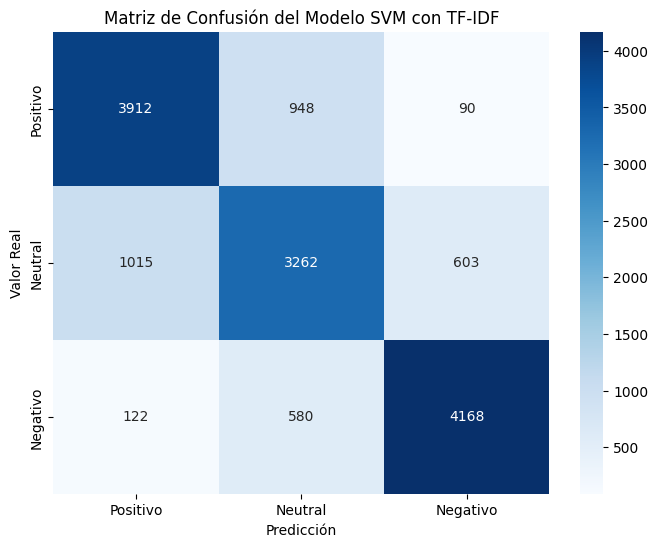

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje para la gráfica
plt.figure(figsize=(8, 6))

# Crear la gráfica de la matriz de confusión utilizando seaborn
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Positivo', 'Neutral', 'Negativo'], yticklabels=['Positivo', 'Neutral', 'Negativo'])

# Agregar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo SVM con TF-IDF')

# Mostrar la gráfica
plt.show()

In [ ]:
####CONCLUSIONES EL MODELO ES BUENO PERO AÚN NO ES TAN COMPLETO COMO SE ESPERABA

In [63]:

# Descargar el archivo desde GCS
blob = bucket.blob(gcs_folder + model_filename)
blob.download_to_filename(model_filename)

# Cargar el modelo desde el archivo descargado
loaded_model = joblib.load(model_filename)

# Eliminar el archivo descargado después de cargar el modelo
os.remove(model_filename)

# Nuevo review para clasificar
new_review = "The attention was good"

# Preprocesar el nuevo review
new_review_cleaned = preprocess_text(new_review)
new_review_tfidf = tfidf_vectorizer.transform([new_review_cleaned])

# Realizar la predicción con el modelo cargado
predicted_sentimiento = loaded_model.predict(new_review_tfidf)

print("Sentimiento Predicho:", predicted_sentimiento[0])




Sentimiento Predicho: Positivo


In [2]:
###############DATOS GOOGLE
import pandas as pd

csv_path1 = "gs://bucket-ph-dataset/POST_ETL_DATASETS/Google_Maps_Data/gm_reviews.csv" 
df_g_reviews = pd.read_csv(csv_path1)
df_g_reviews.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908575 entries, 0 to 1908574
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   review_id  object 
 1   user_id    float64
 2   date       object 
 3   rating     int64  
 4   text       object 
 5   resp       object 
 6   gmap_id    object 
 7   state_id   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 116.5+ MB


In [3]:
#Eliminamos conlumnas innecesarias para el entrenamiento

df_g_reviews.drop(columns=['user_id','date','resp','gmap_id','state_id'],inplace=True)
df_g_reviews.dropna(subset=['text'],inplace=True)
df_g_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077491 entries, 0 to 1908574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   review_id  1077491 non-null  object
 1   rating     1077491 non-null  int64 
 2   text       1077491 non-null  object
dtypes: int64(1), object(2)
memory usage: 32.9+ MB


In [4]:
conteo_ratings = df_g_reviews['rating'].value_counts()
print(conteo_ratings)

rating
5    657830
4    198644
3     92898
1     80079
2     48040
Name: count, dtype: int64


In [5]:
average_chars = df_g_reviews['text'].str.len().mean()
print("Promedio de caracteres en las reseñas:", average_chars)

Promedio de caracteres en las reseñas: 119.81294321715912


In [7]:
longest_review = df_g_reviews.loc[df_g_reviews['text'].str.len().idxmax()]['text']
print("Review más largo:\n", longest_review)

Review más largo:
 (Translated by Google) I have been visiting the Place for a long time in large groups and many times alone with my partner because we like to go out to dinner ... and if I have time at my lunch I visit them.
This time we had a very big disappointment with his service, with his touch and with his actions, which I think were in very bad taste. I explain.

We ordered a take-away meal by phone, since we were visiting the place at our lunch hour, I mean 1 hour the main plan was to go pick up and return.
When leaving work to go looking for food, other employees wanted to eat from there and we let them know that we would do them the favor of ordering their meals when we went to pick up ours, I arrive at the cashier, he explained that I have another order that Ask, that I wanted to place an order right there (fried cheese) and that I had other orders to order to take away. She explains to me that to order the fried cheese I have to ask for it at the table, that she would cha

In [8]:
#Luego del analisis consideramos solo los reviews con menores a 500 caracteres
df_g_reviews = df_g_reviews[df_g_reviews['text'].str.len() > 3]
df_g_reviews = df_g_reviews[df_g_reviews['text'].str.len() <= 500]
df_g_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036755 entries, 0 to 1908574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   review_id  1036755 non-null  object
 1   rating     1036755 non-null  int64 
 2   text       1036755 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.6+ MB


In [9]:

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Crear una instancia del stemmer y del lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Obtener la lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Función para realizar la limpieza de texto, lematización y eliminar stop words
def preprocess_text(text):
    # Tokenización
    words = word_tokenize(text)
    
    # Eliminar signos de puntuación, números y convertir a minúsculas
    cleaned_words = [word.lower() for word in words if word.isalpha()]
    
    # Lematización y eliminar stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words if word not in stop_words]
    
    # Reconstruir el texto limpio
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text

# Supongamos que ya tienes tus reseñas en el DataFrame df_y_reviews
# y la columna 'text' contiene las reseñas

# Aplicar la función de preprocesamiento a todas las reseñas
df_g_reviews['cleaned_text'] = df_g_reviews['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df_g_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036755 entries, 0 to 1908574
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   review_id     1036755 non-null  object
 1   rating        1036755 non-null  int64 
 2   text          1036755 non-null  object
 3   cleaned_text  1036755 non-null  object
dtypes: int64(1), object(3)
memory usage: 39.5+ MB


In [11]:
##volvemos aplicar los filtros de tamaño una vez procesados
# Calcular las longitudes de las reseñas preprocesadas
df_g_reviews['cleaned_text_length'] = df_g_reviews['cleaned_text'].str.len()

# Verificar si las reseñas cumplen con tus criterios
min_length = 5  # Por ejemplo, si tu mínimo original era 3
max_length = 500  # Por ejemplo, si tu máximo original era 500

filtered_reviews = df_g_reviews[
    (df_g_reviews['cleaned_text_length'] >= min_length) &
    (df_g_reviews['cleaned_text_length'] <= max_length)
]

print("Cantidad de reseñas que cumplen con los criterios:", len(filtered_reviews))
df_g_reviews.drop(columns=['cleaned_text_length'],inplace=True)

Cantidad de reseñas que cumplen con los criterios: 1013882


In [12]:
df_g_reviews = df_g_reviews[df_g_reviews['cleaned_text'].str.len() > 5]
df_g_reviews = df_g_reviews[df_g_reviews['cleaned_text'].str.len() <= 500]
df_g_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004661 entries, 0 to 1908574
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   review_id     1004661 non-null  object
 1   rating        1004661 non-null  int64 
 2   text          1004661 non-null  object
 3   cleaned_text  1004661 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.3+ MB


In [13]:
#Primero vamos a considerar los 3 sentimientos de acuerdo al ranting
def mapear_sentimiento(stars):
    if stars <= 2:
        return 'Negativo'
    elif stars == 3:
        return 'Neutral'
    elif stars >= 4:
        return 'Positivo'

df_g_reviews['Sentimiento_Mapeado'] = df_g_reviews['rating'].map(mapear_sentimiento)

In [14]:
conteo_sent = df_g_reviews['Sentimiento_Mapeado'].value_counts()
print(conteo_sent)

Sentimiento_Mapeado
Positivo    809917
Negativo    111111
Neutral      83633
Name: count, dtype: int64


In [15]:
####Realizamos el balance de clases

# Cantidad deseada por cada clase
desired_samples = 83500

# Filtrar muestras por cada clase y tomar una muestra aleatoria de tamaño desired_samples
positive_samples = df_g_reviews[df_g_reviews['Sentimiento_Mapeado'] == 'Positivo'].sample(desired_samples)
negative_samples = df_g_reviews[df_g_reviews['Sentimiento_Mapeado'] == 'Negativo'].sample(desired_samples)
neutral_samples = df_g_reviews[df_g_reviews['Sentimiento_Mapeado'] == 'Neutral'].sample(desired_samples)

# Concatenar las muestras balanceadas en un nuevo DataFrame
balanced_df = pd.concat([positive_samples, negative_samples, neutral_samples])

# Restablecer los índices del nuevo DataFrame
balanced_df.reset_index(drop=True, inplace=True)

# Imprimir información sobre la distribución de clases en el nuevo DataFrame
print(balanced_df['Sentimiento_Mapeado'].value_counts())

Sentimiento_Mapeado
Positivo    83500
Negativo    83500
Neutral     83500
Name: count, dtype: int64


In [16]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250500 entries, 0 to 250499
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   review_id            250500 non-null  object
 1   rating               250500 non-null  int64 
 2   text                 250500 non-null  object
 3   cleaned_text         250500 non-null  object
 4   Sentimiento_Mapeado  250500 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.6+ MB


In [17]:
#GUARDAMOS EN UN CSV

balanced_df.to_csv('gs://bucket-ph-dataset/POST_PP_ML/cl_reviews_gm.csv', index=False, encoding="utf-8")

In [18]:
#CARGAMOS NUESTRO CSV

csv_path1 = "gs://bucket-ph-dataset/POST_PP_ML/cl_reviews_gm.csv" 
df_g_reviews = pd.read_csv(csv_path1)
df_g_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250500 entries, 0 to 250499
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   review_id            250500 non-null  object
 1   rating               250500 non-null  int64 
 2   text                 250500 non-null  object
 3   cleaned_text         250500 non-null  object
 4   Sentimiento_Mapeado  250500 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.6+ MB


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_g_reviews['cleaned_text']
y = df_g_reviews['Sentimiento_Mapeado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la matriz TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=1000)  # Puedes ajustar el número de features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7029141716566867

Classification Report:
               precision    recall  f1-score   support

    Negativo       0.71      0.75      0.73     16523
     Neutral       0.62      0.55      0.58     16976
    Positivo       0.77      0.81      0.79     16601

    accuracy                           0.70     50100
   macro avg       0.70      0.70      0.70     50100
weighted avg       0.70      0.70      0.70     50100



In [ ]:
##########MODELO BERT - SE REALIZÓ EN COLAB POR EL GPU

In [5]:
import pandas as pd
csv_path1 = "gs://bucket-ph-dataset/POST_PP_ML/cl_reviews_gm.csv" 
df_g_reviews = pd.read_csv(csv_path1)
df_g_reviews.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250500 entries, 0 to 250499
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   review_id            250500 non-null  object
 1   rating               250500 non-null  int64 
 2   text                 250500 non-null  object
 3   cleaned_text         250500 non-null  object
 4   Sentimiento_Mapeado  250500 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.6+ MB


In [21]:
!pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/21/02/ae8e595f45b6c8edee07913892b3b41f5f5f273962ad98851dc6a564bbb9/transformers-4.31.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 3.6 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.14.1 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/37/9b/5d880ca9f94a2e4f16111507674910ca1932cffbd2bbeb688b8c8102a6d0/safetensors-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 73.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268

In [23]:
!pip install torch torchvision torchaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 25.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 7.6 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 51.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 49.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 93.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 22.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification

PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#MODELO IMPORTADO BERT

In [45]:
import joblib
from transformers import pipeline

# Crear la tubería
pipe = pipeline("text-classification", model="MarieAngeA13/Sentiment-Analysis-BERT")

# Guardar la tubería en un archivo
joblib.dump(pipe, "bert_model.joblib")

['bert_model.joblib']

In [62]:
import joblib


loaded_pipe = joblib.load("bert_model.joblib")


#text_to_analyze = "The food was more or less, the attention should be faster"
#text_to_analyze = "The attention was not so good they took time to serve me"
text_to_analyze = "The menu was very varied and the food was very good."

result = loaded_pipe(text_to_analyze)
sentiment = result[0]['label']
confidence = result[0]['score']

print("Sentimiento:", sentiment)
print("Confianza:", confidence)

Sentimiento: positive
Confianza: 0.9611210823059082
